<a href="https://colab.research.google.com/github/aashutoshkumarbhardwaj/today1/blob/master/day32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [5]:
df=pd.read_csv('/content/sample_data/train.csv', usecols=['Age', 'Fare','Survived'])
df.dropna(inplace=True)
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x= df.iloc[:,1:]
y=df.iloc[:,0]

In [8]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [9]:
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [11]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6363636363636364

In [12]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6345070422535211)

In [13]:
kbin_age=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans')
kbin_fare=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans')

In [14]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [15]:
x_trains_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [16]:
trf.named_transformers_['first'].n_bins_

array([5])

In [18]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      , 12.69636862, 27.02765256, 39.35418895, 54.21464646,
              80.        ])                                                   ],
      dtype=object)

In [19]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_trains_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_trains_trf[:,1]
})

In [21]:
output['age_lebels'] = pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_lebels'] = pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())
output.head()

,age,age_trf,fare,fare_trf,age_lebels,fare_lebels
328,31.0,2.0,20.5250,0.0,"(27.028, 39.354]","(0.0, 42.424]"
73,26.0,1.0,14.4542,0.0,"(12.696, 27.028]","(0.0, 42.424]"
253,30.0,2.0,16.1000,0.0,"(27.028, 39.354]","(0.0, 42.424]"
719,33.0,2.0,7.7750,0.0,"(27.028, 39.354]","(0.0, 42.424]"
666,25.0,1.0,13.0000,0.0,"(12.696, 27.028]","(0.0, 42.424]"


In [22]:
clf= DecisionTreeClassifier()
clf.fit(x_trains_trf,y_train)
y_pred2=clf.predict(x_test_trf)
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [23]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x_trf,y,cv=10,scoring='accuracy'))

np.float64(0.6723982785602504)

In [25]:
def discretize(bins,strategy):
  kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

  trf=ColumnTransformer([
      ('first',kbin_age,[0]),
      ('second',kbin_fare,[1])
  ])
  x_trf = trf.fit_transform(x)
  print(np.mean(cross_val_score(DecisionTreeClassifier(),x_trf,y,cv=10,scoring='accuracy')))
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(x['Age'])
  plt.title('before')

  plt.subplot(122)
  plt.hist(x_trf[:,0], color='red')
  plt.title('after')
  plt.show()

0.6584702660406886


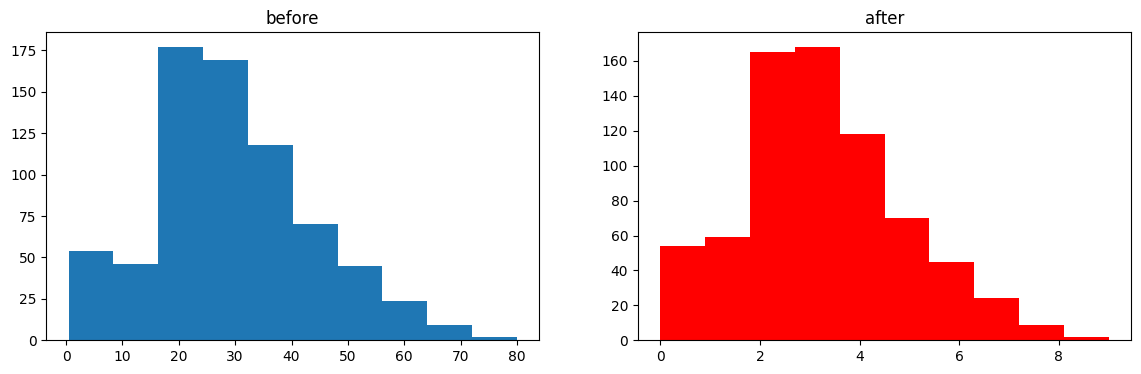

In [29]:
discretize(10,'kmeans')